# Presidental Inaugural Addresses Data Exploration and Analysis
---

## The purpose of this project was to gain experience in the following areas:
- Webscraping
- Data processing
- Data visualization
- Data exploration
- NLP
- Machine learning
- General programming and coding with python

## In order to accomplish this I set out with three goals in mind:
1. Automate the collection of a dataset from a website
2. Explore the data through machine learning, visualizations, and analysis
3. Derive a series of conclusions about the data and speeches for a broader audience
---


## Part 1: Webscraping
### Project Goal Addressed: 1 (Automate the collection of a dataset from a website)

This section of the project deals with the automated collection of a dataset through the use of webscraping. While it is possible to just go in and copy/paste from a website into a CSV or text file, it is ineffecient and I would not learn any relevant coding skills in the process. To accomplish this task we are going to use the BeautifulSoup and requests library to pull the speeches from our target site.

---

So to start, we'll make our necessary import for this stage of the project. 

In [1]:
#make imports
import requests
from bs4 import BeautifulSoup
import csv

From there we set our target url, in this case it is the index from which all the presidential inaugural addresses are linked to. This is a great launching point for our webscrape. After exploring the code of the site, we are able to see how they have structured their page, using a table to house all the links to the speeches we are after. So using that information we are able to scrape the table for all the target links. We will save those, and then print the first couple to make sure they have saved to our "targets" list appropriately. 

In [2]:
#setting up initial url parse and scrape
url = 'https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/inaugural-addresses'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

#find the table with links to the speeches
table =soup.find('table', class_="table")

#extract containers with links
links = table.find_all('a')
targets = []

#Iterate over list of containers to extract specific links
for link in links:
    site = link.get('href')
    targets.append(site)
print(targets[0:2])


['https://www.presidency.ucsb.edu/ws/index.php?pid=25800', 'https://www.presidency.ucsb.edu/ws/index.php?pid=25801']


---
Awesome, now we can go in and explore a couple of the sites that have the actual text and info from the speeches we are after. After we inspect the structure, we can set up a simple "for" loop that will loop over each site in our "targets" list and pull the relevant information that we want. For this scrape we will be collecting the following data:
- date(the date of the speech)
- texts(the actual text of the speech itself)
- name(the name of the person giving the speech)

All of these will be appended as a list of objects to a list, giving us a decent array to work from when we are done. Additionally we will also append the "target" from our "targets" list so we know what site the speech came from. Finally we will print the first entry in "final_list" to confirm that the scrape was succesful. 

In [3]:
#using the links from the targets list, go to each one and scrape that site for the date, text of the speech, and link
final_list =[]
for target in targets:
    webpage = requests.get(target)
    content = BeautifulSoup(webpage.content, 'html.parser')
    date = content.find('span', class_='date-display-single')
    texts = content.find('div', class_='field-docs-content')
    name = content.find('h3', class_='diet-title')
    name = name.text
    date = date.text
    texts = texts.text
    entry = [name, date, texts, target]
    final_list.append(entry)
print(final_list[0])

['George Washington', 'April 30, 1789', '\nFellow-Citizens of the Senate and of the House of Representatives:\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years—a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scruti

That looks like it collected all the information we were after, so we are close to finishing our data collection. However we should include some code to save our data as a CSV in the event we want to easily share it or make it more effecient to process. Running the webscrape everytime you want to run the program is time and resource intensive and means you are dependent on a live internet connection and websites being up. As opposed to having all of your libraries and data stores locally. 

Let's include the code, but commented out. 

In [4]:
#code if you were to want to make a csv of the resulting data
#note there may be an error for william henry harrison(go figure) that results in odd formatting
#formatting is fine in list format and converts to dataframe fine
#fields = ['name','date', 'speech', 'link']
#filename = 'inaugural addresses v3.csv'
#with open(filename, 'w', newline ='') as csvfile:
    # creating a csv writer object
 #   csvwriter = csv.writer(csvfile)
    # writing the fields
 #   csvwriter.writerow(fields)
    # writing the data rows
  #  csvwriter.writerows(final_list)

When this code was run, all the entries saved correctly, except the sole inaugural address for William Henry Harrison. While this is annoying, our array is correct and unaffected by the issue so we can continue our data exploration and analysis, however, it would be worth going back and trouble shooting to figure out what the problem was. Saving the data as a pickle is also a viable option. 

### Part 1 Complete

And there we have it. We have successfully scraped all of the US presidents and their inaugural addresses. While we have yet to process and use our data, we can consider goal number 1 checked off for this project. 

---

## Part 2: Data Processing and Exploration
### Project Goals Addressed: 
###     2 (Explore the data through machine learning, visualizations, and analysis)
###     3 (Derive a series of conclusions about the data and speeches for a broader audience)


While we have been successful with our webscrape, now comes the bulk of our work and where we really want to focus our attention. Some areas where we are going to be focusing include but are not limited to:
- Cleaning our data and getting it into an appropriate format for data analysis
- Utilizing machine learning to try and classify or derive some conclusions from these speeches without having to read them ourselves
- Derive some numerical data and features from the text data to see if there are any conclusions that we can draw 
---

So to start lets import pandas, and convert our "final_list" array into a dataframe, previewing the first few entries to get a feel for what it looks like. 

In [5]:
#import pandas library 
import pandas as pd

#create a dataframe "df" from our "final_list" array
df = pd.DataFrame(final_list)
print(df.head())

                   0               1  \
0  George Washington  April 30, 1789   
1  George Washington  March 04, 1793   
2         John Adams  March 04, 1797   
3   Thomas Jefferson  March 04, 1801   
4   Thomas Jefferson  March 04, 1805   

                                                   2  \
0  \nFellow-Citizens of the Senate and of the Hou...   
1  \nFellow Citizens:\nI AM again called upon by ...   
2  \nWHEN it was first perceived, in early times,...   
3  \nFriends and Fellow-Citizens:\nCALLED upon to...   
4  \nPROCEEDING, fellow-citizens, to that qualifi...   

                                                   3  
0  https://www.presidency.ucsb.edu/ws/index.php?p...  
1  https://www.presidency.ucsb.edu/ws/index.php?p...  
2  https://www.presidency.ucsb.edu/ws/index.php?p...  
3  https://www.presidency.ucsb.edu/ws/index.php?p...  
4  https://www.presidency.ucsb.edu/ws/index.php?p...  


Alright it is looking good. But it looks like we have no column names, let's add those so we know what we are working with in our dataframe.  

In [6]:
df.columns = ['name','date', 'speech', 'link']
print(df.head())

                name            date  \
0  George Washington  April 30, 1789   
1  George Washington  March 04, 1793   
2         John Adams  March 04, 1797   
3   Thomas Jefferson  March 04, 1801   
4   Thomas Jefferson  March 04, 1805   

                                              speech  \
0  \nFellow-Citizens of the Senate and of the Hou...   
1  \nFellow Citizens:\nI AM again called upon by ...   
2  \nWHEN it was first perceived, in early times,...   
3  \nFriends and Fellow-Citizens:\nCALLED upon to...   
4  \nPROCEEDING, fellow-citizens, to that qualifi...   

                                                link  
0  https://www.presidency.ucsb.edu/ws/index.php?p...  
1  https://www.presidency.ucsb.edu/ws/index.php?p...  
2  https://www.presidency.ucsb.edu/ws/index.php?p...  
3  https://www.presidency.ucsb.edu/ws/index.php?p...  
4  https://www.presidency.ucsb.edu/ws/index.php?p...  


Much better. Looking at our speech category, it is apparent that we have retained some of hte HTML code from when we scraped our speeches off the website. Lets clean those up. To do that, let's make a simple function that replaces "\n" with nothing and then apply it to our dataframe with a lambda. 

In [7]:
#simple function to remove \n from our speeches. 
def replace_n(x):
    y = x.replace("\n", "")
    return y
#apply the function to remove \n from all the speeches
df['speech'] = df.apply(lambda x: replace_n(x['speech']), axis = 1)
print(df['speech'].iloc[1])

Fellow Citizens:I AM again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.



Looking great, we have cleared out the "\n" tags that were leftover from when we scraped the initial data. Now let's take a quick peek and see some of the information related to our dataframe. 



In [8]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    58 non-null     object
 1   date    58 non-null     object
 2   speech  58 non-null     object
 3   link    58 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB
None
(58, 4)


In [9]:
#convert date column to datetime datatype
df['date'] = pd.to_datetime(df['date'])
print(df['date'].head())

0   1789-04-30
1   1793-03-04
2   1797-03-04
3   1801-03-04
4   1805-03-04
Name: date, dtype: datetime64[ns]


In [10]:
print(df.head())

                name       date  \
0  George Washington 1789-04-30   
1  George Washington 1793-03-04   
2         John Adams 1797-03-04   
3   Thomas Jefferson 1801-03-04   
4   Thomas Jefferson 1805-03-04   

                                              speech  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:I AM again called upon by the ...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:CALLED upon to und...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                                link  
0  https://www.presidency.ucsb.edu/ws/index.php?p...  
1  https://www.presidency.ucsb.edu/ws/index.php?p...  
2  https://www.presidency.ucsb.edu/ws/index.php?p...  
3  https://www.presidency.ucsb.edu/ws/index.php?p...  
4  https://www.presidency.ucsb.edu/ws/index.php?p...  


So while it did not take much, we have actually ended up with a dataframe filled with data. Not only do we have our data but given how we scraped and stored our data, it is also tidy. Each row represents one specific "observation" or point of data. This is a great place to begin our data exploration and working with our speeches. 

One of the things that I am curious about is whether or not a president was similar or different when compared to other presidents. To accomplish this, we will use the TfidfVectorizer to build a similarity index. Tfidf is a great starting point because it allows us to eventually build a similarity matrix. Essentially seeing how similar and different each speech is based on the vocabulary and vocabulary frequency found in each speech. For now we will leave the parameters in their defaults for the vectorizer. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
speech_matrix =  vectorizer.fit_transform([x for x in df["speech"]])
print(speech_matrix.shape)

(58, 9170)


That is a good chunk of data. By that is to be expected given that we are comparing 58 speeches(with many being quite large) against one another. From here what we are going to do is compare the various matrices against each other in order to build a similarity matrix. So by comparing the various speech matrices against one another using  cosine similarity we can build a matrix that shows how similar/different the various speeches are with each other. When we are done we should have a matrix that is 58x58. 

In [12]:
# Import cosine_similarity to calculate similarity of the various speeches
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(speech_matrix)
print(similarity_distance.shape)
print(similarity_distance[0])

(58, 58)
[0.         0.38002041 0.17538375 0.17383384 0.18854354 0.1694812
 0.21011854 0.15157106 0.14855553 0.15630424 0.17780861 0.17880839
 0.16598924 0.13237635 0.1572629  0.17624869 0.15064363 0.16063995
 0.1859136  0.30049956 0.23986499 0.1914823  0.14799681 0.16382234
 0.17720132 0.17452428 0.18916274 0.16288884 0.18368306 0.28264869
 0.15251832 0.2486859  0.25352752 0.24603829 0.20162048 0.18317659
 0.2151893  0.26929812 0.238871   0.39536108 0.26364086 0.23519882
 0.26509857 0.2851426  0.32659041 0.28232825 0.31483806 0.368083
 0.27817976 0.29194863 0.31268327 0.35797138 0.28846078 0.40171972
 0.24971907 0.29363318 0.35173574 0.39603064]


So the first print out there shows our shape of the similarity_distance matrix. It was as we expected, 58x58. We have also taken a look at the first row of the matrix. So what we are looking at is on a scale of 0 to 1, how similar the first speech in our dataframe is with every other speech. 0 is identical, 1 is no similarity whatsoever. 

The value of the first entry in similarity_distance[0] is 0 because the speech is being compared to itself, so it should be identical. Let's take a look at a different speech, maybe the 6th(index 5) in our matrix, just to perform another spot check.

In [13]:
print(similarity_distance[5])

[0.1694812  0.38413763 0.15894071 0.15387437 0.15976996 0.
 0.18447954 0.12452536 0.13540644 0.12435096 0.15092046 0.15851623
 0.13466723 0.11258185 0.12735541 0.148018   0.13906644 0.13914847
 0.17310733 0.29629026 0.20746802 0.17224614 0.12960042 0.1456768
 0.15674243 0.14069217 0.16473243 0.14049585 0.16098601 0.2576492
 0.1265841  0.22566345 0.22755223 0.21333268 0.17044199 0.15389848
 0.20104525 0.23548654 0.21048964 0.37928097 0.22505341 0.19388169
 0.22428297 0.2556497  0.3047402  0.24502248 0.28272106 0.34916245
 0.25470689 0.26313839 0.29908682 0.32274339 0.25434154 0.36556952
 0.22981379 0.26644583 0.31747573 0.38020731]


There it is, the 6th entry reads 0. Which is what we would expect. While this matrix seems to be working it is a large matrix of numbers and not very visually pleasing or easy to read at a glance. So to do that we are going to get some data visualization going. Let's build a heatmap in order to get a nice visual representation of what we are seeing. 

In [14]:
#make imports
import seaborn as sns
import matplotlib.pyplot as plt
#make a heatmap to visually show the similarity distance
sim_df = pd.DataFrame(similarity_distance)
name_date = [x for x in df['name']+' ' +[y for y in df['date'].astype(str)]]
sim_df.index = name_date
sim_df.columns = name_date
fig, ax = plt.subplots(figsize=(20,20)) 
h_map = sns.heatmap(sim_df, ax = ax, linewidth = 0.15, cmap = "coolwarm")
plt.show(h_map)

<Figure size 2000x2000 with 2 Axes>

We now have our first piece of data visualization. At first glance a couple things stand out. Let's break it down a little so we know what we are looking at before actually diving into some facets of the data itself. 
- The X and Y axes are the same. This is because of the way our similarity_distance matrix is constructed. Since our matrix is composed of each speech compared to each speech, it makes sense that they should be on both the X and Y axes. 
- The colors represent the distance. The warmer(redder) the color, the farther apart the speeches are from each other. 
- Since we have presidents who have served more than one term, each speech's president is concatenated with the date to create a unique label. This also lets us have a nice easy check of dates of speecches without having to memorize date ranges for over 40 presidents.
- There is a diagonal line of solid dark blue moving through the graph. This is actually a nice point of validation since the dark blue represents a value of 0 for the similarity distance between speeches(i.e. they are identical). Since a speech compared against itself should be identical and have a value of 0, this is a confirmation that things are working as they should be. We saw this in the numerical representation of the matrix, but with it represented here as well, we know it translated into the visualization. 

So that is an introduction into what we are looking at. Now let's start thinking about what we are seeing in terms of potential areas of further targeted data exploration. Since we went into this dataset relatively blind with no distinct objective(e.g. seeing how a specific president compared to another) we hae a lot of freedom with how we approach this. A couple questions that arise from an intiial scan of the heatmap raises a couple points(if you gravitated towards a different idea, that is fine):

- George Washington's second inaugural address(1793-03-04) seems completely at odds with every other speech out there.
- Franklin D. Roosevelt's speech from 1945 also looks to be distinct from most other speeches
- Same with Lincoln's 1865 speech. 
- It looks like there may be some distinct clusters or stronger groupings of speeches within the map.
- There may be a relationship between date and similarity. 

Alright, that is a good place to start with some more focused and targeted data exploration. In order to this we are going to try and get some features of these speeches and also look to see if there are some Machine Learning models that could help us understand what we are looking at. 


First up, a k-means cluster analysis. See if there are clusters that emerge from the various speeches. 

In [15]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 6 clusters and save as km
km = KMeans(n_clusters=5, random_state = 829)

# Fit the k-means object with speech_matrix
km.fit(speech_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each speech
df["cluster"] = clusters

# Display number of speeches per cluster (clusters from 0 to 4)
df['cluster'].value_counts()

1    31
0    15
2    10
4     1
3     1
Name: cluster, dtype: int64

In [16]:
print(df.head())

                name       date  \
0  George Washington 1789-04-30   
1  George Washington 1793-03-04   
2         John Adams 1797-03-04   
3   Thomas Jefferson 1801-03-04   
4   Thomas Jefferson 1805-03-04   

                                              speech  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:I AM again called upon by the ...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:CALLED upon to und...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                                link  cluster  
0  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
1  https://www.presidency.ucsb.edu/ws/index.php?p...        4  
2  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
3  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
4  https://www.presidency.ucsb.edu/ws/index.php?p...        1  


In [17]:
print(df[['name','date']][df['cluster']==(4)])
print(df[['name','date']][df['cluster']==(3)])

                name       date
1  George Washington 1793-03-04
                     name       date
39  Franklin D. Roosevelt 1945-01-20


Well isn't that interesting. Two of the speeches we identified from our heatmap as being dissimilar to the others, have also been classified as being in their own clusters through an application of a k-means clustering. These two speeches certainly look like they should be investigated further. 

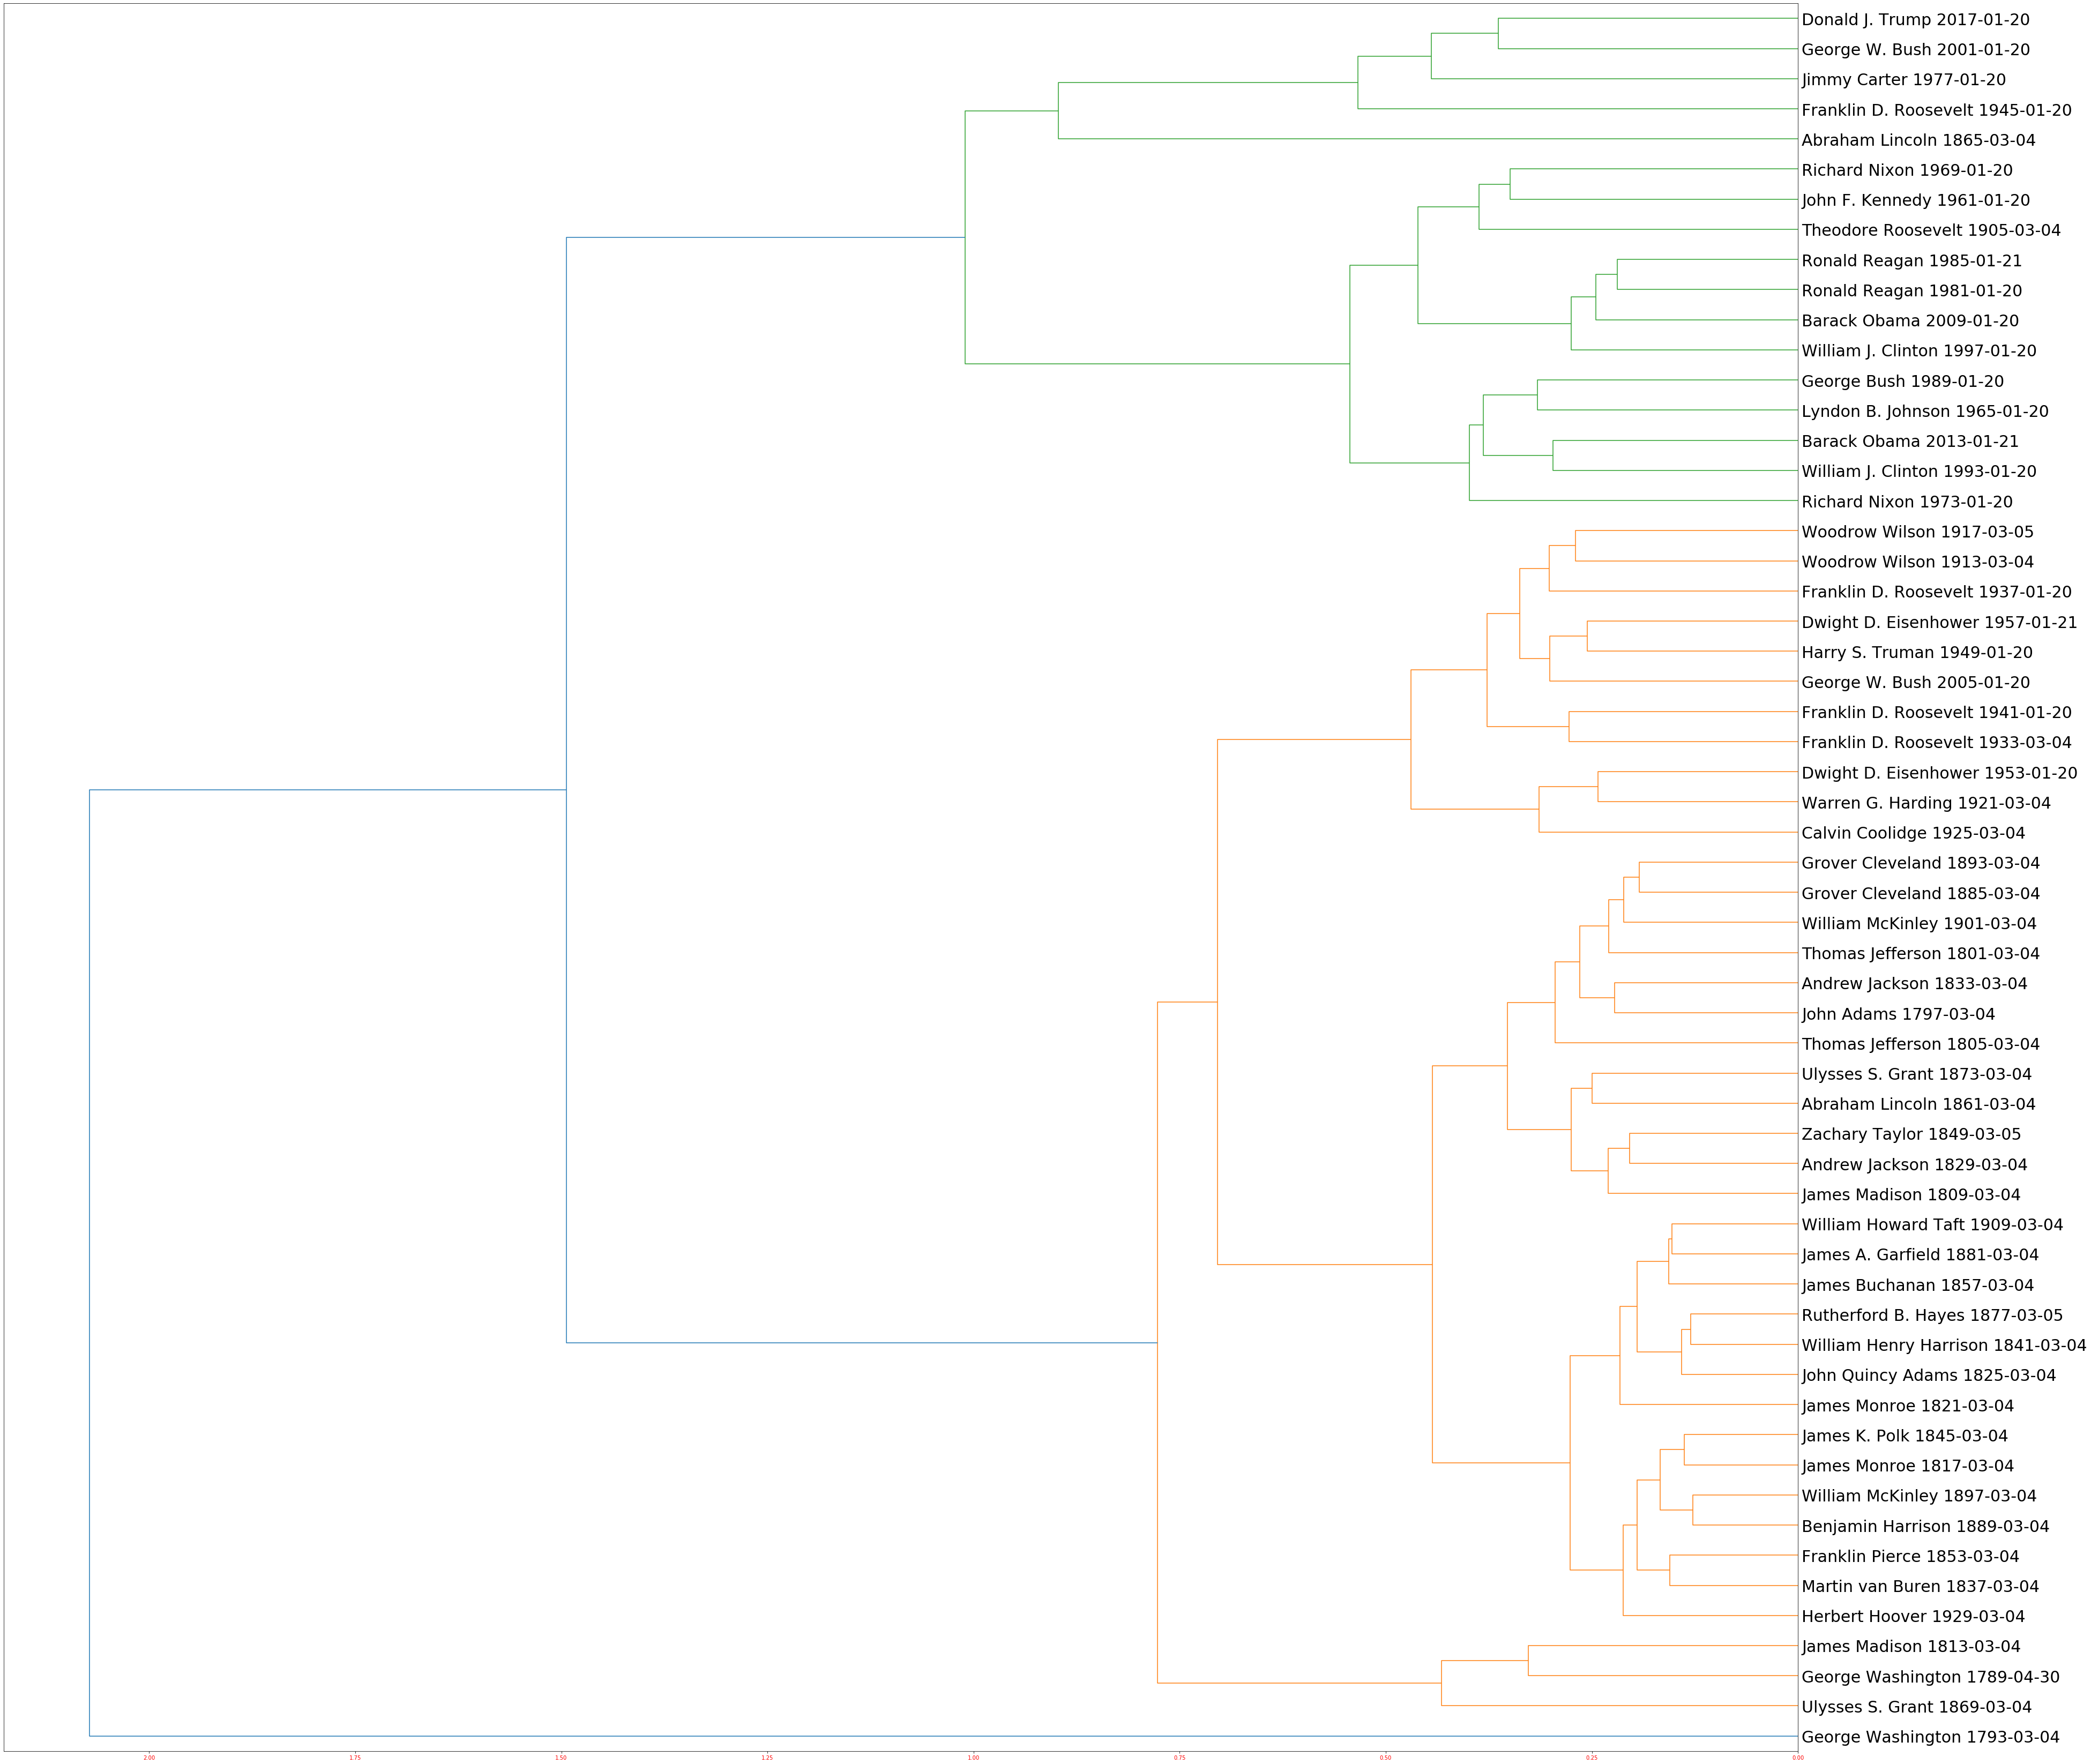

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create mergings matrix
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings, orientation="left",
               labels=[x for x in df['name']+' ' +[y for y in df['date'].astype(str)]],
               #leaf_rotation=90,
               leaf_font_size=30
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(60,60)

# Show the plotted dendrogram
plt.show()

In [21]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import pandas as pd

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
def word_count(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    words = []
    for w in word_tokenize:
        words.append(w)
    return(len(words))

In [23]:
df['word count'] = df.apply(lambda x: word_count(x['speech']), axis = 1)

In [24]:
df['speech word mean'] = df['word count'].mean()
df['speech word median'] = df['word count'].median()
df['mean word over time'] = df['word count'].expanding().mean()
df['median word over time'] =df['word count'].expanding().median()

In [26]:
df['speech char length'] = df['speech'].str.len()

In [28]:
df['speech char mean'] = df['speech char length'].mean()
df['speech char median'] = df['speech char length'].median()
df['mean char over time'] = df['speech char length'].expanding().mean()
df['median char over time'] =df['speech char length'].expanding().median()

C:\Users\NH-DB\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\NH-DB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


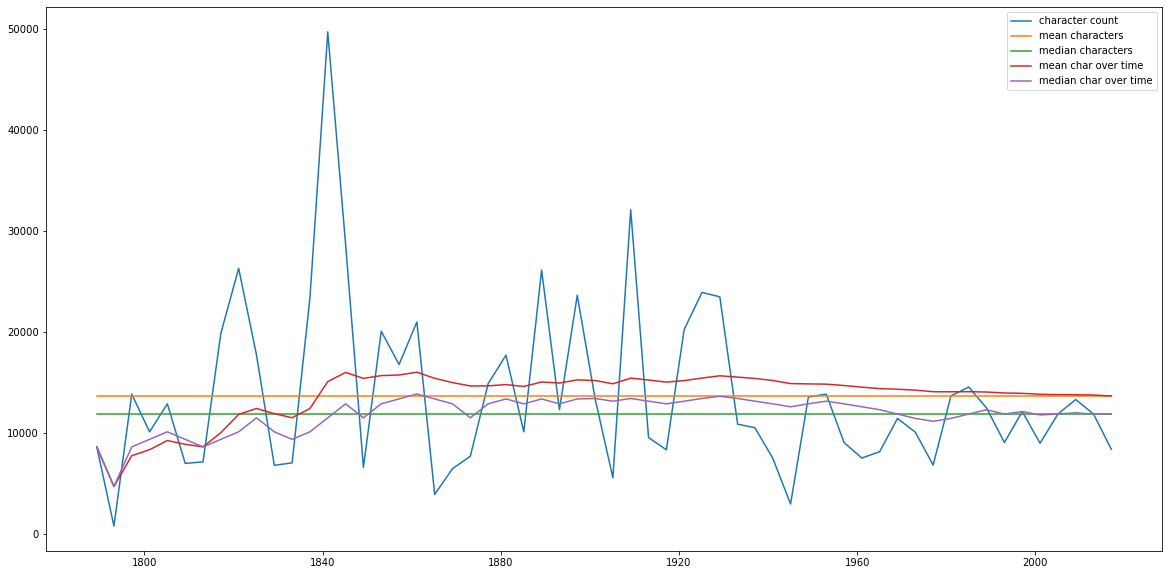

In [29]:

plt.plot(df['date'],df[['speech char length', 'speech char mean', 'speech char median', 'mean char over time', 'median char over time']])
plt.legend(labels = ['character count' ,'mean characters','median characters', 'mean char over time', 'median char over time'], loc ='best')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

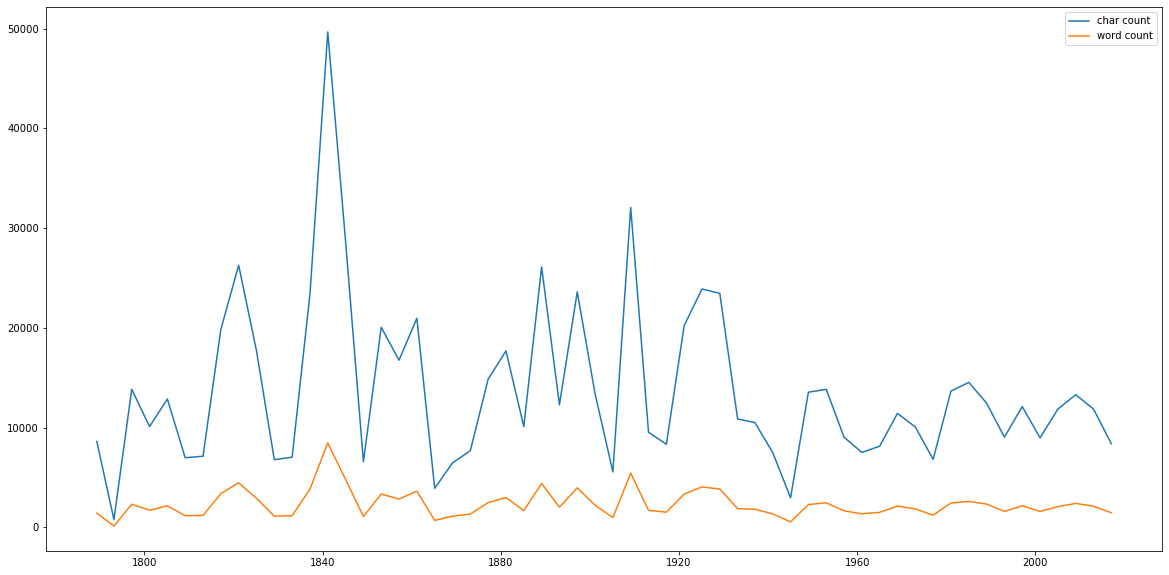

In [30]:
plt.plot(df['date'],df[['speech char length','word count']])
plt.legend(labels = ['char count','word count'], loc ='best')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [31]:
df['char per word'] = df['speech char length']/df['word count']


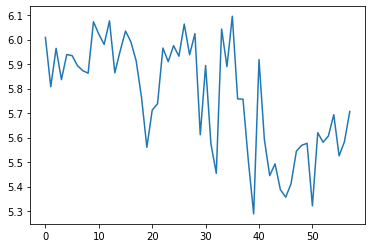

In [32]:
df['char per word'].plot()
plt.show()

In [33]:
def word_length(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    words = []
    for w in word_tokenize:
        words.append(w)
    lengths = []
    for w in words:
        lengths.append(len(w))
    return lengths

In [34]:
import numpy as np
gw1 = np.asarray(word_length(df['speech'].iloc[0]))
gw2 = np.asarray(word_length(df['speech'].iloc[1]))


In [35]:
def avg_word_length(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    words = []
    for w in word_tokenize:
        words.append(w)
    lengths = []
    for w in words:
        lengths.append(len(w))
    ary = np.asarray(lengths)
    avg = ary.mean()
    return avg

In [36]:
def median_word_length(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    words = []
    for w in word_tokenize:
        words.append(w)
    lengths = []
    for w in words:
        lengths.append(len(w))
    ary = np.asarray(lengths)
    med = np.median(ary)
    return med

In [37]:
df['avg word length'] = df.apply(lambda x: avg_word_length(x['speech']), axis = 1) 


In [38]:
df['median word length'] = df.apply(lambda x: median_word_length(x['speech']), axis = 1)

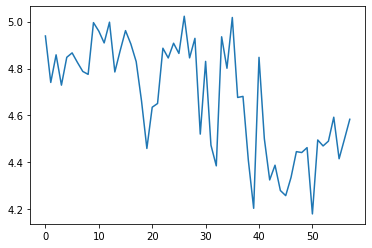

In [39]:
df['avg word length'].plot()
plt.show()

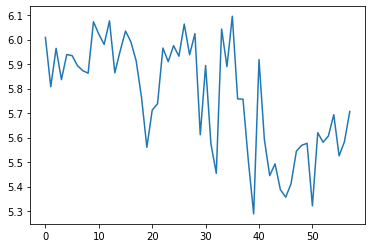

In [40]:
df['char per word'].plot()
plt.show()

In [41]:
df['mean word length over time'] = df['avg word length'].expanding().mean()


In [42]:
df['mean char count over time'] = df['char per word'].expanding().mean()


C:\Users\NH-DB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


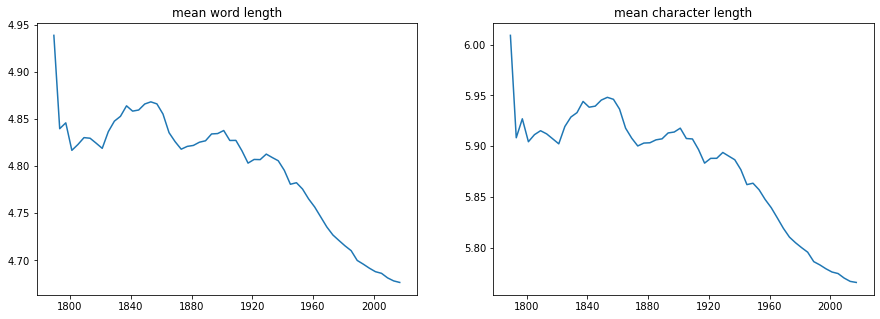

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
ax1.plot(df['date'],df['mean word length over time'])
ax2.plot(df['date'],df['mean char count over time'])
ax1.title.set_text('mean word length')
ax2.title.set_text('mean character length')
fig.set_size_inches(15,5)
plt.show()

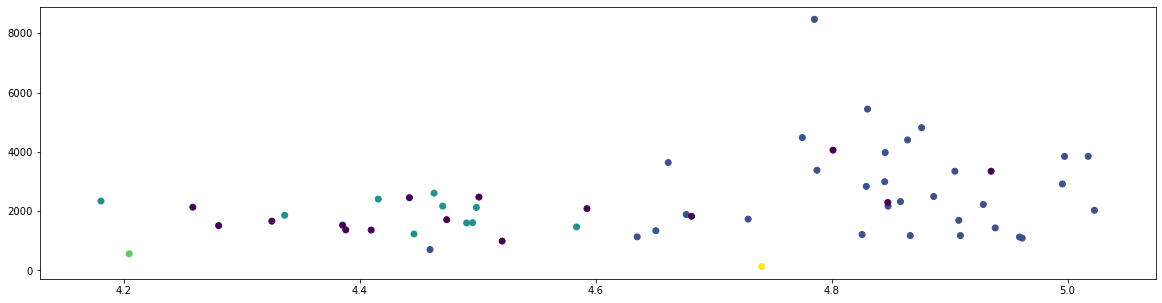

In [44]:
plt.scatter(df['avg word length'], df['word count'], c =df['cluster'])
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

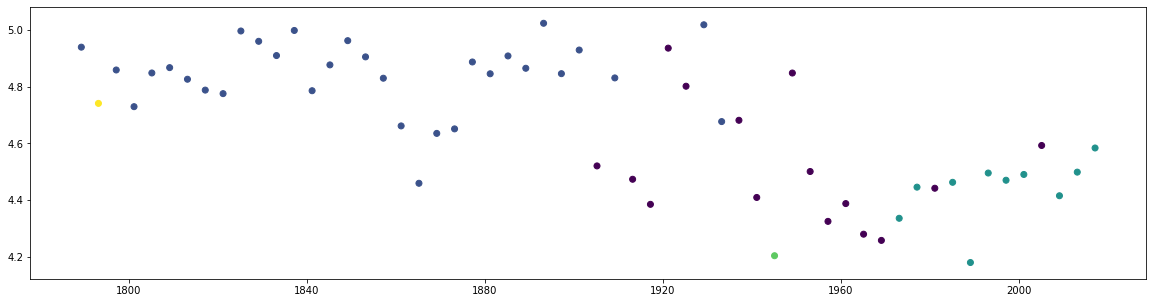

In [45]:
plt.scatter(df['date'],df['avg word length'], c = df.cluster)
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

In [46]:
import plotly.express as px


In [47]:
fig = px.line(df, x='date', y=['word count', 'speech word mean', 'speech word median', 'mean word over time', 'median word over time'], hover_name = 'name')
fig.show()
fig.write_html("C:/Users/NH-DB/Desktop/line.html")

In [54]:
fig = px.scatter(df, x="date", y="word count", color = df['cluster'], hover_name = 'name')
fig.show()

In [55]:
fig = px.scatter(df, x="avg word length", y="word count", color = df['cluster'], hover_name = 'name')
fig.show()

In [52]:

fig = px.scatter(df, x="date", y="avg word length", color = df['cluster'], hover_name = 'name')
fig.show()

In [51]:
fig = px.imshow(sim_df, x = name_date, y=name_date, width = 1200, height = 1200, color_continuous_scale= 'YlGnBu')
fig.show()
